In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Convolutional neural networks (CNN) is used to convert digital image content into a single vector of numbers(numeric vector) representing the unique characteristics of the image.
* The column of numbers is inputted to a Dense fully connected Neural network layer against the labels, which image is cat, which image is bird etc.
* The classification model learns these numeric vector inputs against the labels

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random

# Importing Library for Data Visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Importing Tensorflow for model creation and its dependencies
import tensorflow

# Generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator

# for enabling inline plotting
%matplotlib inline

In [ ]:
# Deep Learning CNN model to recognize ball
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''########################## IMAGE PRE-PROCESSING for TRAINING and TESTING data ##############################'''

TrainingImagePath=R'/content/drive/MyDrive/Jaringan Saraf Tiruan/Image Classification/Leukemia/train'
TestingImagePath=R'/content/drive/MyDrive/Jaringan Saraf Tiruan/Image Classification/Leukemia/test'
ValidationImagePath=R'/content/drive/MyDrive/Jaringan Saraf Tiruan/Image Classification/Leukemia/valid'

# Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

# Generating the Testing Data
valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 3256 images belonging to 4 classes.
Found 8 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


### Reading the Images data

In [ ]:
# Function to plot any random image from dataset
def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(TrainingImagePath, class_name)
    try:
        if(class_name == "Benign"):
          image_path=os.path.join(folder_path,"WBC-Benign-"+str(random_index).zfill(3)+".jpg")
          plt.imshow(mpimg.imread(image_path))
        elif (class_name == "Early"):
          image_path=os.path.join(folder_path,"WBC-Malignant-Early-"+str(random_index).zfill(3)+".jpg")
          plt.imshow(mpimg.imread(image_path))
        elif (class_name == "Pre"):
          image_path=os.path.join(folder_path,"WBC-Malignant-Pre-"+str(random_index).zfill(3)+".jpg")
          plt.imshow(mpimg.imread(image_path))
        elif (class_name == "Pro"):
          image_path=os.path.join(folder_path,"WBC-Malignant-Pro-"+str(random_index).zfill(3)+".jpg")
          plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

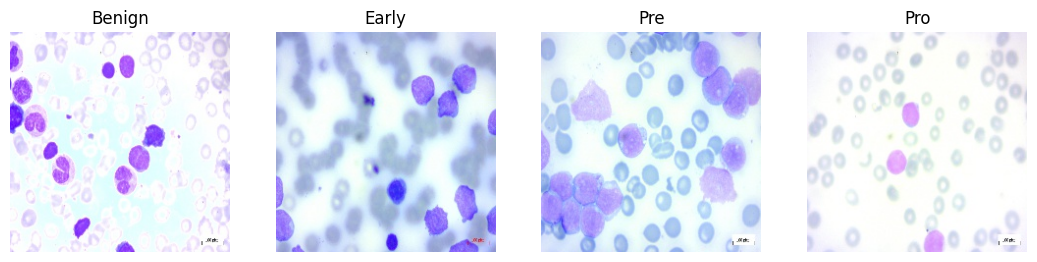

In [ ]:
plt.figure(figsize = (20,20))
for labels,number in training_set.class_indices.items():
    plt.subplot(6,6,number+1)
    showImages(labels)


In [ ]:
# Printing class labels for each face
test_set.class_indices

{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}

### Creating a list of faces and classes

In [ ]:
'''#################### Creating lookup table for all balls ##############################'''
# class_indices have the numeric tag for each balls
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for ballValue,ballName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[ballValue]=ballName

# Saving the face map for future reference
import pickle
with open(R"/content/drive/MyDrive/Jaringan Saraf Tiruan/Image Classification/ResultMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'Benign', 1: 'Early', 2: 'Pre', 3: 'Pro'}

 The Number of output neurons:  4


### Creating the CNN model

In [ ]:
'''######################## Create CNN deep learning model ####################################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

### Fitting the model

In [ ]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training

model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

<ipython-input-54-d98fbda6c7d2>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/20
102/102 [==============================] - 594s 6s/step - loss: 1.9945 - accuracy: 0.3750 - val_loss: 1.3691 - val_accuracy: 0.2000
Epoch 2/20
102/102 [==============================] - 118s 1s/step - loss: 1.0914 - accuracy: 0.5777 - val_loss: 1.2303 - val_accuracy: 0.4500
Epoch 3/20
102/102 [==============================] - 118s 1s/step - loss: 0.6935 - accuracy: 0.7067 - val_loss: 1.0190 - val_accuracy: 0.7500
Epoch 4/20
102/102 [==============================] - 118s 1s/step - loss: 0.5253 - accuracy: 0.7718 - val_loss: 0.9436 - val_accuracy: 0.7500
Epoch 5/20
102/102 [==============================] - 120s 1s/step - loss: 0.4165 - accuracy: 0.8265 - val_loss: 0.8615 - val_accuracy: 0.6500
Epoch 6/20
102/102 [==============================] - 125s 1s/step - loss: 0.3773 - accuracy: 0.8529 - val_loss: 0.7531 - val_accuracy: 0.7500
Epoch 7/20
102/102 [==============================] - 133s 1s/step - loss: 0.3218 - accuracy: 0.8799 - val_loss: 0.8458 - val_accuracy: 0.6000

In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

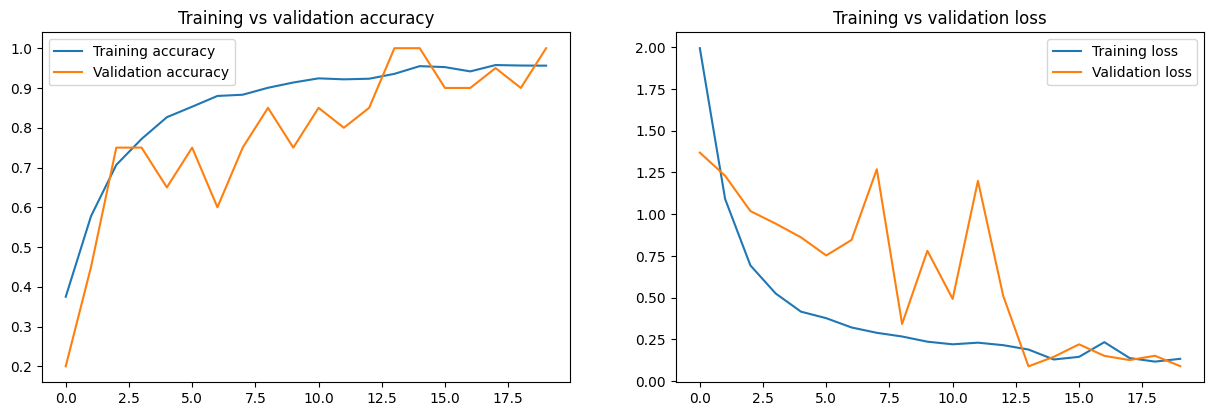

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

### Saving the model

In [ ]:
## Saving the model
classifier.save(R"/content/drive/MyDrive/Jaringan Saraf Tiruan/Image Classification/classifier.pkl")

### Testing the model on a different face

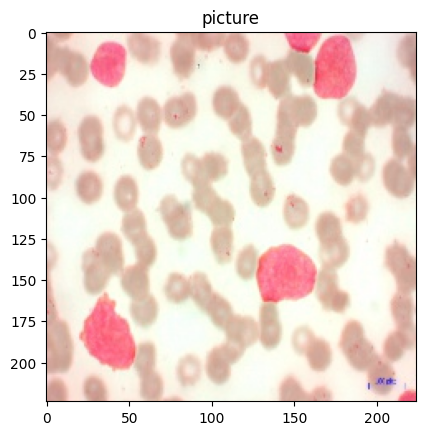

########################################
Prediction is:  Early


In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage=R"/content/drive/MyDrive/Jaringan Saraf Tiruan/Image Classification/Leukemia/test/Early/WBC-Malignant-Early-005.jpg"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

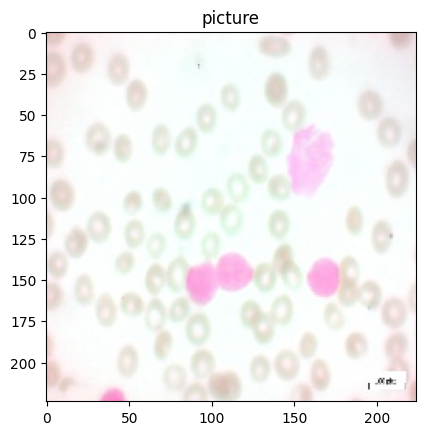

########################################
Prediction is:  Pro


In [ ]:
'''########################## Making single predictions ############################'''
testImage=R"/content/drive/MyDrive/Jaringan Saraf Tiruan/Image Classification/Leukemia/test/Pro/WBC-Malignant-Pro-030.jpg"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])